## 선형회귀 프로젝트
#### 목표 : 여성 월급 예측하기 

    - test ; 15세 가정환경, 나이, 학력, 결혼여부 로 예측해보기

In [138]:
import pandas as pd

In [139]:
# 컬럼 재설정 
data = pd.read_csv('./datas/data_1ver.200812.csv', sep=',', encoding = 'euc-kr')
data.columns = ['case', 'ID', 'fa_job', 'fa_edu', 'life_15', 'fama_rel_15', 'age',
       'edu', 'marry_YN', 'JOBSAL']
data_1 = data.copy()
data_1 = data_1[1:]
data_1

,case,ID,fa_job,fa_edu,life_15,fama_rel_15,age,edu,marry_YN,JOBSAL
1,1,101,6,2,3,1,60,2,1,50
2,2,101,6,2,3,1,61,2,1,50
3,3,101,6,2,3,1,63,2,1,50
4,4,101,6,2,3,1,65,2,1,80
5,5,101,6,2,3,1,67,2,1,100
...,...,...,...,...,...,...,...,...,...,...
25312,7,6204402,7,3,3,3,51,7,1,180
25313,6,6204502,6,2,3,2,41,4,1,150
25314,7,6204502,6,2,3,2,43,4,1,170
25315,6,6204901,6,2,3,2,61,2,1,60


In [140]:
data_1 = data_1.astype("float") 

In [141]:
# 조사시기 5차 이후 데이터만 필터링해서 추이 파악하기
# data_2 => 5, 6, 7차 조사 데이터 프레임

data_2 = data_1[data_1['case'] >= 5]
data_2 = data_2.astype(int)
data_2.reset_index()

,index,case,ID,fa_job,fa_edu,life_15,fama_rel_15,age,edu,marry_YN,JOBSAL
0,5,5,101,6,2,3,1,67,2,1,100
1,6,7,202,7,2,3,3,48,5,1,120
2,11,5,302,5,4,3,2,52,7,1,350
3,12,6,302,5,4,3,2,54,7,1,450
4,13,5,402,6,3,2,2,44,6,1,150
...,...,...,...,...,...,...,...,...,...,...,...
12787,25312,7,6204402,7,3,3,3,51,7,1,180
12788,25313,6,6204502,6,2,3,2,41,4,1,150
12789,25314,7,6204502,6,2,3,2,43,4,1,170
12790,25315,6,6204901,6,2,3,2,61,2,1,60


In [142]:
# 월급의 분포 확인하기 
import plotly_express as px
%matplotlib inline

fig = px.histogram(data_2, x='JOBSAL')
fig.show()

In [143]:
data_2["JOBSAL"].describe()

count    12792.000000
mean       171.054253
std        109.148605
min         10.000000
25%        100.000000
50%        150.000000
75%        200.000000
max       1500.000000
Name: JOBSAL, dtype: float64

In [144]:
# 특징별 종속변수(월급) 관계 시각화

In [145]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

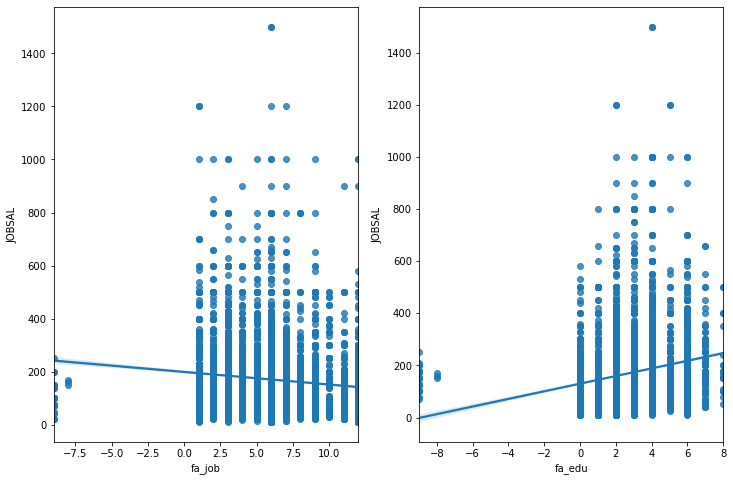

In [146]:
# 아버지 직업, 아버지 교육정도 : 월급
plt.figure(figsize=(12, 8))
plt.subplot(121)
sns.regplot(x="fa_job", y='JOBSAL', data=data_2)
plt.subplot(122)
sns.regplot(x="fa_edu", y='JOBSAL', data=data_2)

plt.show()

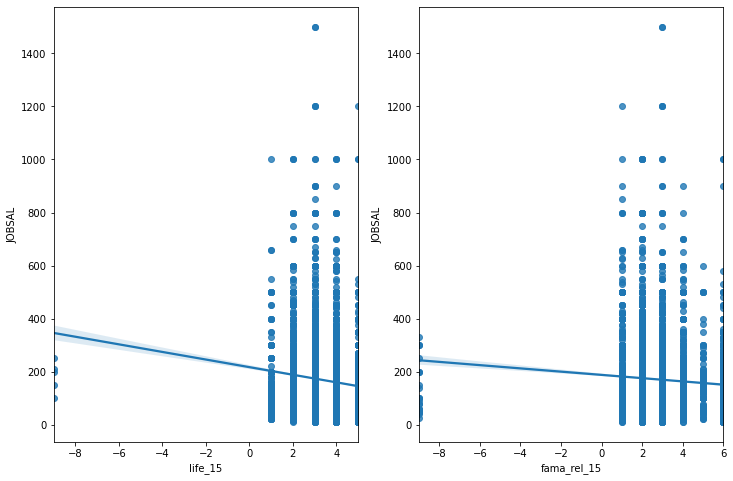

In [147]:
# 15세 생활정도, 15세 부모님관계 : 월급
plt.figure(figsize=(12, 8))
plt.subplot(121)
sns.regplot(x="life_15", y='JOBSAL', data=data_2)
plt.subplot(122)
sns.regplot(x="fama_rel_15", y='JOBSAL', data=data_2)

plt.show()

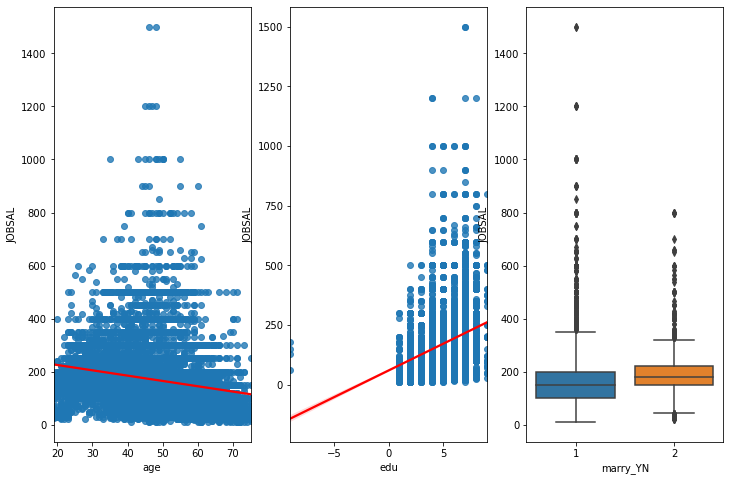

In [148]:
# 나이, 학력, 결혼유무 : 월급
plt.figure(figsize=(12, 8))
plt.subplot(131)
sns.regplot(x="age", y='JOBSAL', data=data_2, line_kws={'color':'red'})
plt.subplot(132)
sns.regplot(x="edu", y='JOBSAL', data=data_2, line_kws={'color':'red'})
plt.subplot(133)
sns.boxplot(x="marry_YN", y='JOBSAL', data=data_2)


plt.show()

In [149]:
# OLS 로 R, coef, p 값 확인
X = data_2[data_2.columns.drop(['JOBSAL', 'case', 'ID'])]
y = data_2["JOBSAL"]

In [150]:
import statsmodels.api as sm
model = sm.OLS(y, X)
results = model.fit()

In [151]:
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                 JOBSAL   R-squared (uncentered):                   0.750
Model:                            OLS   Adj. R-squared (uncentered):              0.750
Method:                 Least Squares   F-statistic:                              5478.
Date:                Mon, 17 Aug 2020   Prob (F-statistic):                        0.00
Time:                        09:06:21   Log-Likelihood:                         -77246.
No. Observations:               12792   AIC:                                  1.545e+05
Df Residuals:                   12785   BIC:                                  1.546e+05
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

In [152]:
# 아빠직업(6: 농림어업 숙련 종사자), 아빠교육정도(3: 중학교), 
# 15세 생활정도(2: 대체로 잘 사는 편이었다), 15세 부모님관계(1: 아주 좋은 편이었다)
# 나이(37세), 학력(7: 4년제 대학), 결혼여부(1: 있다)
results.predict([[6, 3, 2, 1, 37, 7, 1]])

array([212.66547443])

## 전체 데이터로 월급 예측하기

### 월급에 있어서 경력은 매우 중요한 요소라고 생각 -> 경력 컬럼 추가!
- **정확한 경력은 알 수없어 임의로 계산하기로 결정함**

#### 첫직장 입직/퇴직/유지여부, 이전직장 입직/퇴직 컬럼 추가함
- 각 시점이 없는 데이터가 많았음. 
    1. 각 입직 시점이 없는 경우 -> drop : 계산 불가능
    2. 첫직장 퇴직시점이 없는경우
        - 첫직장 유지 O -> 마지막 조사 차수 시기로 대체 
        - 첫직장 유지 X -> 이전직장 퇴직 시점으로 대체 
    3. 이전직장 퇴직시점이 없는 경우 -> 임의로 마지막 조사한 차수의 시기로 채워넣기로 함  

In [153]:
data = pd.read_csv('./datas/데이터_초안_0812.csv', sep=',', encoding = 'euc-kr')
data
# 조사회차	패널ID	15세 아버지 직업	아버지 최종학력	15세 가정 형편	15세 부모님 관계	연령	학력	
# 결혼경험	고등학교 종류	대학전공	대학소재지	일자리구분(정규/비정규)	직위	직장종류	사업체 직원 수	
# 월 급여	첫 직장입직	첫 직장 퇴직	첫직장 유지	새로운 일자리 입직	하던일 퇴직	최근 일자리 그만둔 시점	
# 이전일자리 입직	이전일자리 퇴직

data.columns = ['case', 'ID', 'fa_job', 'fa_edu', 'life_15', 'fama_rel_15', 'age', 'edu', 
                'marry_YN','hschool','univ_mjor', 'univ_area', 'jung_bi', 'level', 'j_type', 'job_pp', 
                'JOBSAL', 'job_1_in', 'job_1_out', 'job_1_keep', 'njob_in', 'njob_out', 'rjob_out', 
                'pjob_in', 'pjob_out']
data_1 = data.copy()
data_1 = data_1[2:]
data_1

c:\users\82106\anaconda3\envs\fc14th\lib\site-packages\IPython\core\interactiveshell.py:3072: DtypeWarning:

Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24) have mixed types.Specify dtype option on import or set low_memory=False.



,case,ID,fa_job,fa_edu,life_15,fama_rel_15,age,edu,marry_YN,hschool,...,job_pp,JOBSAL,job_1_in,job_1_out,job_1_keep,njob_in,njob_out,rjob_out,pjob_in,pjob_out
2,1,101,6,2,3,1,60,2,1,NaN,...,NaN,50,1970,NaN,1,NaN,NaN,NaN,NaN,NaN
3,2,101,6,2,3,1,61,2,1,NaN,...,NaN,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3,101,6,2,3,1,63,2,1,NaN,...,NaN,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,4,101,6,2,3,1,65,2,1,NaN,...,NaN,80,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,5,101,6,2,3,1,67,2,1,NaN,...,NaN,100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62423,6,6204702,6,1,3,2,59,4,1,3,...,NaN,0,1976,1978,2,NaN,NaN,NaN,NaN,NaN
62424,7,6204702,6,1,3,2,61,4,1,NaN,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
62425,6,6204802,6,2,4,2,53,4,1,3,...,NaN,0,1984,NaN,1,NaN,NaN,NaN,NaN,NaN
62426,6,6204901,6,2,3,2,61,2,1,NaN,...,NaN,60,1977,NaN,1,1978,NaN,NaN,NaN,NaN


In [154]:
data_1.info()
data_1 = data_1.replace('', np.nan)
data_1 = data_1.astype("float")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62426 entries, 2 to 62427
Data columns (total 25 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   case         62426 non-null  object
 1   ID           62426 non-null  object
 2   fa_job       62426 non-null  object
 3   fa_edu       62426 non-null  object
 4   life_15      62426 non-null  object
 5   fama_rel_15  62426 non-null  object
 6   age          62426 non-null  object
 7   edu          62426 non-null  object
 8   marry_YN     62426 non-null  object
 9   hschool      11028 non-null  object
 10  univ_mjor    6173 non-null   object
 11  univ_area    6173 non-null   object
 12  jung_bi      17212 non-null  object
 13  level        30974 non-null  object
 14  j_type       17212 non-null  object
 15  job_pp       17212 non-null  object
 16  JOBSAL       29397 non-null  object
 17  job_1_in     10757 non-null  object
 18  job_1_out    8974 non-null   object
 19  job_1_keep   10757 non-nu

In [155]:
# 첫 직장 입직년도를 1990년도 이후로 선별
data_1_1990 = data_1[data_1['job_1_in']>=1990]
data_1_1990.tail()

,case,ID,fa_job,fa_edu,life_15,fama_rel_15,age,edu,marry_YN,hschool,...,job_pp,JOBSAL,job_1_in,job_1_out,job_1_keep,njob_in,njob_out,rjob_out,pjob_in,pjob_out
62403,6.0,6203901.0,4.0,4.0,3.0,3.0,48.0,7.0,1.0,2.0,...,NaN,NaN,1990.0,2000.0,2.0,NaN,NaN,NaN,1990.0,2000.0
62407,6.0,6204102.0,5.0,3.0,4.0,3.0,39.0,6.0,1.0,1.0,...,NaN,NaN,1999.0,2009.0,2.0,NaN,NaN,NaN,2014.0,2014.0
62409,6.0,6204202.0,6.0,2.0,4.0,3.0,42.0,4.0,1.0,3.0,...,1.0,60.0,1994.0,1999.0,2.0,NaN,1999.0,NaN,2014.0,2015.0
62413,6.0,6204303.0,7.0,4.0,3.0,2.0,28.0,8.0,2.0,1.0,...,3.0,250.0,2011.0,2014.0,2.0,NaN,NaN,NaN,2011.0,2014.0
62419,6.0,6204502.0,6.0,2.0,3.0,2.0,41.0,4.0,1.0,3.0,...,3.0,150.0,1993.0,2014.0,2.0,NaN,NaN,NaN,NaN,NaN


In [156]:
# 나이를 60세 이하로 선별
data_1_1990_age = data_1_1990[data_1_1990['age'] <= 60]
data_1_1990_age

,case,ID,fa_job,fa_edu,life_15,fama_rel_15,age,edu,marry_YN,hschool,...,job_pp,JOBSAL,job_1_in,job_1_out,job_1_keep,njob_in,njob_out,rjob_out,pjob_in,pjob_out
20,1.0,402.0,6.0,3.0,2.0,2.0,37.0,6.0,1.0,1.0,...,NaN,NaN,1992.0,1995.0,2.0,NaN,NaN,2000.0,1995.0,2000.0
36,1.0,702.0,7.0,2.0,5.0,2.0,35.0,4.0,1.0,3.0,...,6.0,250.0,1990.0,1991.0,2.0,NaN,NaN,NaN,1992.0,1993.0
41,1.0,802.0,3.0,4.0,3.0,3.0,33.0,7.0,1.0,1.0,...,4.0,167.0,1995.0,1997.0,2.0,NaN,NaN,NaN,1998.0,1999.0
44,1.0,901.0,2.0,6.0,2.0,1.0,34.0,7.0,1.0,2.0,...,NaN,NaN,1999.0,2000.0,2.0,NaN,2003.0,2007.0,2006.0,2007.0
51,1.0,1002.0,5.0,4.0,3.0,2.0,33.0,7.0,1.0,1.0,...,NaN,200.0,1997.0,1999.0,2.0,NaN,NaN,NaN,1997.0,1999.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62403,6.0,6203901.0,4.0,4.0,3.0,3.0,48.0,7.0,1.0,2.0,...,NaN,NaN,1990.0,2000.0,2.0,NaN,NaN,NaN,1990.0,2000.0
62407,6.0,6204102.0,5.0,3.0,4.0,3.0,39.0,6.0,1.0,1.0,...,NaN,NaN,1999.0,2009.0,2.0,NaN,NaN,NaN,2014.0,2014.0
62409,6.0,6204202.0,6.0,2.0,4.0,3.0,42.0,4.0,1.0,3.0,...,1.0,60.0,1994.0,1999.0,2.0,NaN,1999.0,NaN,2014.0,2015.0
62413,6.0,6204303.0,7.0,4.0,3.0,2.0,28.0,8.0,2.0,1.0,...,3.0,250.0,2011.0,2014.0,2.0,NaN,NaN,NaN,2011.0,2014.0


In [157]:
# 첫직장 퇴직시점에 na값이 1245개 발견
data_1_1990_age = data_1_1990_age.fillna(0)
np.unique(data_1_1990_age['job_1_out'], return_counts=True)

(array([  -9.,   -8.,    0., 1990., 1991., 1992., 1993., 1994., 1995.,
        1996., 1997., 1998., 1999., 2000., 2001., 2002., 2003., 2004.,
        2005., 2006., 2007., 2008., 2009., 2010., 2011., 2012., 2013.,
        2014., 2015., 2016., 2017., 2018.]),
 array([  19,    1, 1245,   20,   67,  139,  179,  246,  256,  270,  276,
         265,  272,  261,  222,  236,  217,  222,  223,  196,  219,   67,
          48,   50,   39,   44,   44,   42,   39,   45,   20,   10],
       dtype=int64))

In [158]:
# 첫 직장 유지여부 확인하여 첫직장 퇴직연도 넣어주기
data_1_1990_age['job_1_out_2'] = np.where(data_1_1990_age['job_1_keep'] == 1, data_1_1990_age['case'],
                                          (np.where( data_1_1990_age['job_1_out'] != 0 , data_1_1990_age['job_1_out'],
                                                   data_1_1990_age['pjob_out'])))

In [159]:
# 첫직장 유지할 경우 마지막 조사차수를 퇴직년도로 넣기
data_1_1990_age['job_1_out_2'] = data_1_1990_age['job_1_out_2']\
.replace(1, 2007).replace(2, 2008).replace(3, 2010).replace(4, 2012)\
.replace(5, 2014).replace(6, 2016).replace(7, 2018)

data_1_1990_age

,case,ID,fa_job,fa_edu,life_15,fama_rel_15,age,edu,marry_YN,hschool,...,JOBSAL,job_1_in,job_1_out,job_1_keep,njob_in,njob_out,rjob_out,pjob_in,pjob_out,job_1_out_2
20,1.0,402.0,6.0,3.0,2.0,2.0,37.0,6.0,1.0,1.0,...,0.0,1992.0,1995.0,2.0,0.0,0.0,2000.0,1995.0,2000.0,1995.0
36,1.0,702.0,7.0,2.0,5.0,2.0,35.0,4.0,1.0,3.0,...,250.0,1990.0,1991.0,2.0,0.0,0.0,0.0,1992.0,1993.0,1991.0
41,1.0,802.0,3.0,4.0,3.0,3.0,33.0,7.0,1.0,1.0,...,167.0,1995.0,1997.0,2.0,0.0,0.0,0.0,1998.0,1999.0,1997.0
44,1.0,901.0,2.0,6.0,2.0,1.0,34.0,7.0,1.0,2.0,...,0.0,1999.0,2000.0,2.0,0.0,2003.0,2007.0,2006.0,2007.0,2000.0
51,1.0,1002.0,5.0,4.0,3.0,2.0,33.0,7.0,1.0,1.0,...,200.0,1997.0,1999.0,2.0,0.0,0.0,0.0,1997.0,1999.0,1999.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62403,6.0,6203901.0,4.0,4.0,3.0,3.0,48.0,7.0,1.0,2.0,...,0.0,1990.0,2000.0,2.0,0.0,0.0,0.0,1990.0,2000.0,2000.0
62407,6.0,6204102.0,5.0,3.0,4.0,3.0,39.0,6.0,1.0,1.0,...,0.0,1999.0,2009.0,2.0,0.0,0.0,0.0,2014.0,2014.0,2009.0
62409,6.0,6204202.0,6.0,2.0,4.0,3.0,42.0,4.0,1.0,3.0,...,60.0,1994.0,1999.0,2.0,0.0,1999.0,0.0,2014.0,2015.0,1999.0
62413,6.0,6204303.0,7.0,4.0,3.0,2.0,28.0,8.0,2.0,1.0,...,250.0,2011.0,2014.0,2.0,0.0,0.0,0.0,2011.0,2014.0,2014.0


In [160]:
# 패널별 마지막 조사차수로 정렬
ata_1_1990_age = data_1_1990_age.groupby("ID").max()
data_1_1990_age

,case,ID,fa_job,fa_edu,life_15,fama_rel_15,age,edu,marry_YN,hschool,...,JOBSAL,job_1_in,job_1_out,job_1_keep,njob_in,njob_out,rjob_out,pjob_in,pjob_out,job_1_out_2
20,1.0,402.0,6.0,3.0,2.0,2.0,37.0,6.0,1.0,1.0,...,0.0,1992.0,1995.0,2.0,0.0,0.0,2000.0,1995.0,2000.0,1995.0
36,1.0,702.0,7.0,2.0,5.0,2.0,35.0,4.0,1.0,3.0,...,250.0,1990.0,1991.0,2.0,0.0,0.0,0.0,1992.0,1993.0,1991.0
41,1.0,802.0,3.0,4.0,3.0,3.0,33.0,7.0,1.0,1.0,...,167.0,1995.0,1997.0,2.0,0.0,0.0,0.0,1998.0,1999.0,1997.0
44,1.0,901.0,2.0,6.0,2.0,1.0,34.0,7.0,1.0,2.0,...,0.0,1999.0,2000.0,2.0,0.0,2003.0,2007.0,2006.0,2007.0,2000.0
51,1.0,1002.0,5.0,4.0,3.0,2.0,33.0,7.0,1.0,1.0,...,200.0,1997.0,1999.0,2.0,0.0,0.0,0.0,1997.0,1999.0,1999.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62403,6.0,6203901.0,4.0,4.0,3.0,3.0,48.0,7.0,1.0,2.0,...,0.0,1990.0,2000.0,2.0,0.0,0.0,0.0,1990.0,2000.0,2000.0
62407,6.0,6204102.0,5.0,3.0,4.0,3.0,39.0,6.0,1.0,1.0,...,0.0,1999.0,2009.0,2.0,0.0,0.0,0.0,2014.0,2014.0,2009.0
62409,6.0,6204202.0,6.0,2.0,4.0,3.0,42.0,4.0,1.0,3.0,...,60.0,1994.0,1999.0,2.0,0.0,1999.0,0.0,2014.0,2015.0,1999.0
62413,6.0,6204303.0,7.0,4.0,3.0,2.0,28.0,8.0,2.0,1.0,...,250.0,2011.0,2014.0,2.0,0.0,0.0,0.0,2011.0,2014.0,2014.0


In [161]:
# 기존 첫직장 퇴직 컬럼 삭제
data_1_1990_age= data_1_1990_age.drop("job_1_out", axis=1) 

In [162]:
data_1_1990_age.columns

Index(['case', 'ID', 'fa_job', 'fa_edu', 'life_15', 'fama_rel_15', 'age',
       'edu', 'marry_YN', 'hschool', 'univ_mjor', 'univ_area', 'jung_bi',
       'level', 'j_type', 'job_pp', 'JOBSAL', 'job_1_in', 'job_1_keep',
       'njob_in', 'njob_out', 'rjob_out', 'pjob_in', 'pjob_out',
       'job_1_out_2'],
      dtype='object')

In [163]:
# 컬럼 위치 재정비
data_1_1990_age = data_1_1990_age[['case', 'fa_job', 'fa_edu', 'life_15', 'fama_rel_15', 'age', 'edu',
       'marry_YN', 'hschool', 'univ_mjor', 'univ_area', 'jung_bi', 'level',
       'j_type', 'job_pp', 'job_1_in', 'job_1_out_2', 'job_1_keep', 'njob_in',
       'njob_out', 'rjob_out', 'pjob_in', 'pjob_out', 'JOBSAL',]]

In [164]:
# 첫직장 퇴직년도 입력 확인
np.unique(data_1_1990_age['job_1_out_2'], return_counts = True)

(array([  -9.,   -8., 1990., 1991., 1992., 1993., 1994., 1995., 1996.,
        1997., 1998., 1999., 2000., 2001., 2002., 2003., 2004., 2005.,
        2006., 2007., 2008., 2009., 2010., 2011., 2012., 2013., 2014.,
        2015., 2016., 2017., 2018.]),
 array([ 19,   1,  20,  67, 139, 179, 246, 257, 270, 276, 265, 272, 261,
        222, 236, 217, 222, 223, 196, 814, 123,  48, 132,  39,  91,  44,
         83,  39, 417,  20,  61], dtype=int64))

In [165]:
data_1_1990_age

,case,fa_job,fa_edu,life_15,fama_rel_15,age,edu,marry_YN,hschool,univ_mjor,...,job_pp,job_1_in,job_1_out_2,job_1_keep,njob_in,njob_out,rjob_out,pjob_in,pjob_out,JOBSAL
20,1.0,6.0,3.0,2.0,2.0,37.0,6.0,1.0,1.0,3.0,...,0.0,1992.0,1995.0,2.0,0.0,0.0,2000.0,1995.0,2000.0,0.0
36,1.0,7.0,2.0,5.0,2.0,35.0,4.0,1.0,3.0,0.0,...,6.0,1990.0,1991.0,2.0,0.0,0.0,0.0,1992.0,1993.0,250.0
41,1.0,3.0,4.0,3.0,3.0,33.0,7.0,1.0,1.0,1.0,...,4.0,1995.0,1997.0,2.0,0.0,0.0,0.0,1998.0,1999.0,167.0
44,1.0,2.0,6.0,2.0,1.0,34.0,7.0,1.0,2.0,5.0,...,0.0,1999.0,2000.0,2.0,0.0,2003.0,2007.0,2006.0,2007.0,0.0
51,1.0,5.0,4.0,3.0,2.0,33.0,7.0,1.0,1.0,12.0,...,0.0,1997.0,1999.0,2.0,0.0,0.0,0.0,1997.0,1999.0,200.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62403,6.0,4.0,4.0,3.0,3.0,48.0,7.0,1.0,2.0,9.0,...,0.0,1990.0,2000.0,2.0,0.0,0.0,0.0,1990.0,2000.0,0.0
62407,6.0,5.0,3.0,4.0,3.0,39.0,6.0,1.0,1.0,3.0,...,0.0,1999.0,2009.0,2.0,0.0,0.0,0.0,2014.0,2014.0,0.0
62409,6.0,6.0,2.0,4.0,3.0,42.0,4.0,1.0,3.0,0.0,...,1.0,1994.0,1999.0,2.0,0.0,1999.0,0.0,2014.0,2015.0,60.0
62413,6.0,7.0,4.0,3.0,2.0,28.0,8.0,2.0,1.0,12.0,...,3.0,2011.0,2014.0,2.0,0.0,0.0,0.0,2011.0,2014.0,250.0


In [166]:
# 경력 컬럼 추가 -> working_y
data_1_1990_age['working_y']=" "
data_1_1990_age

,case,fa_job,fa_edu,life_15,fama_rel_15,age,edu,marry_YN,hschool,univ_mjor,...,job_1_in,job_1_out_2,job_1_keep,njob_in,njob_out,rjob_out,pjob_in,pjob_out,JOBSAL,working_y
20,1.0,6.0,3.0,2.0,2.0,37.0,6.0,1.0,1.0,3.0,...,1992.0,1995.0,2.0,0.0,0.0,2000.0,1995.0,2000.0,0.0,
36,1.0,7.0,2.0,5.0,2.0,35.0,4.0,1.0,3.0,0.0,...,1990.0,1991.0,2.0,0.0,0.0,0.0,1992.0,1993.0,250.0,
41,1.0,3.0,4.0,3.0,3.0,33.0,7.0,1.0,1.0,1.0,...,1995.0,1997.0,2.0,0.0,0.0,0.0,1998.0,1999.0,167.0,
44,1.0,2.0,6.0,2.0,1.0,34.0,7.0,1.0,2.0,5.0,...,1999.0,2000.0,2.0,0.0,2003.0,2007.0,2006.0,2007.0,0.0,
51,1.0,5.0,4.0,3.0,2.0,33.0,7.0,1.0,1.0,12.0,...,1997.0,1999.0,2.0,0.0,0.0,0.0,1997.0,1999.0,200.0,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62403,6.0,4.0,4.0,3.0,3.0,48.0,7.0,1.0,2.0,9.0,...,1990.0,2000.0,2.0,0.0,0.0,0.0,1990.0,2000.0,0.0,
62407,6.0,5.0,3.0,4.0,3.0,39.0,6.0,1.0,1.0,3.0,...,1999.0,2009.0,2.0,0.0,0.0,0.0,2014.0,2014.0,0.0,
62409,6.0,6.0,2.0,4.0,3.0,42.0,4.0,1.0,3.0,0.0,...,1994.0,1999.0,2.0,0.0,1999.0,0.0,2014.0,2015.0,60.0,
62413,6.0,7.0,4.0,3.0,2.0,28.0,8.0,2.0,1.0,12.0,...,2011.0,2014.0,2.0,0.0,0.0,0.0,2011.0,2014.0,250.0,


In [167]:
# 첫직장을 유지하지 않은 사람들의 퇴직년도가 입력되지않아서 분류해서 추가 
keep1 = data_1_1990_age[data_1_1990_age['job_1_keep']==1]
keep2 = data_1_1990_age[data_1_1990_age['job_1_keep']==2]

In [168]:
# 행별 계산이 가능한지 test
keep1['working_y'].values[1] = keep1['job_1_out_2'].values[1] - keep1['job_1_in'].values[1]
keep1.head()

,case,fa_job,fa_edu,life_15,fama_rel_15,age,edu,marry_YN,hschool,univ_mjor,...,job_1_in,job_1_out_2,job_1_keep,njob_in,njob_out,rjob_out,pjob_in,pjob_out,JOBSAL,working_y
94,1.0,5.0,4.0,3.0,2.0,32.0,6.0,1.0,1.0,7.0,...,1997.0,2007.0,1.0,0.0,0.0,0.0,0.0,0.0,180.0,
168,4.0,2.0,6.0,3.0,4.0,19.0,5.0,2.0,1.0,0.0,...,2011.0,2012.0,1.0,0.0,0.0,0.0,0.0,0.0,32.0,1
171,5.0,8.0,4.0,3.0,3.0,19.0,4.0,2.0,3.0,0.0,...,2014.0,2014.0,1.0,0.0,0.0,0.0,0.0,0.0,100.0,
192,4.0,7.0,3.0,3.0,3.0,19.0,4.0,2.0,3.0,0.0,...,2011.0,2012.0,1.0,0.0,0.0,0.0,0.0,0.0,220.0,
221,3.0,7.0,3.0,4.0,3.0,25.0,7.0,2.0,1.0,1.0,...,2010.0,2010.0,1.0,0.0,0.0,0.0,2009.0,2010.0,130.0,


In [169]:
# case 1 : 첫직장을 유지
# -> 첫직장 입직/퇴직으로 총 경력계산 가능
for i in range(len(keep1['job_1_out_2'])):
    keep1['working_y'].values[i] = keep1['job_1_out_2'].values[i] - keep1['job_1_in'].values[i]
    i += 1
    print("종료", end="\t")

종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종

In [170]:
np.unique(keep1['working_y'], return_counts=True)

(array([-1.0, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0,
        12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0,
        23.0, 24.0, 25.0, 26.0], dtype=object),
 array([ 17, 243, 142, 120,  79,  78,  81,  58,  63,  42,  45,  31,  28,
         32,  29,  28,  26,  33,  25,   9,   4,   3,   8,   5,   1,   6,
          1,   7], dtype=int64))

In [171]:
# case 2 : 첫직장을 유지하지 않을 경우
# -> 첫직장 퇴직이 이전직장 퇴직과 같을 경우 -> 이전직장 경력
# -> 첫직장 퇴직이 이전직장 퇴직과 다를 경우 -> 첫직장 입직/퇴직 + 이전직장 입직/퇴직
for i in range(len(keep2['job_1_out_2'])):
    keep2['job_1_out_2'].values[i]
    i += 1
    if keep2['job_1_out_2'].values[i] == keep2['pjob_out'].values[i]:
        keep2['working_y'].values[i] = keep2['pjob_out'].values[i] - keep2['job_1_in'].values[i]
    else: 
        keep2['working_y'].values[i] = (keep2['job_1_out_2'].values[i] - keep2['job_1_in'].values[i]) + (keep2['pjob_out'].values[i] - keep2['pjob_in'].values[i])
    print("종료", end="\t")

종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종

종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종

IndexError: index 4253 is out of bounds for axis 0 with size 4253

In [172]:
data_fin = pd.concat([keep1, keep2])
data_fin

,case,fa_job,fa_edu,life_15,fama_rel_15,age,edu,marry_YN,hschool,univ_mjor,...,job_1_in,job_1_out_2,job_1_keep,njob_in,njob_out,rjob_out,pjob_in,pjob_out,JOBSAL,working_y
94,1.0,5.0,4.0,3.0,2.0,32.0,6.0,1.0,1.0,7.0,...,1997.0,2007.0,1.0,0.0,0.0,0.0,0.0,0.0,180.0,10
168,4.0,2.0,6.0,3.0,4.0,19.0,5.0,2.0,1.0,0.0,...,2011.0,2012.0,1.0,0.0,0.0,0.0,0.0,0.0,32.0,1
171,5.0,8.0,4.0,3.0,3.0,19.0,4.0,2.0,3.0,0.0,...,2014.0,2014.0,1.0,0.0,0.0,0.0,0.0,0.0,100.0,0
192,4.0,7.0,3.0,3.0,3.0,19.0,4.0,2.0,3.0,0.0,...,2011.0,2012.0,1.0,0.0,0.0,0.0,0.0,0.0,220.0,1
221,3.0,7.0,3.0,4.0,3.0,25.0,7.0,2.0,1.0,1.0,...,2010.0,2010.0,1.0,0.0,0.0,0.0,2009.0,2010.0,130.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62403,6.0,4.0,4.0,3.0,3.0,48.0,7.0,1.0,2.0,9.0,...,1990.0,2000.0,2.0,0.0,0.0,0.0,1990.0,2000.0,0.0,10
62407,6.0,5.0,3.0,4.0,3.0,39.0,6.0,1.0,1.0,3.0,...,1999.0,2009.0,2.0,0.0,0.0,0.0,2014.0,2014.0,0.0,10
62409,6.0,6.0,2.0,4.0,3.0,42.0,4.0,1.0,3.0,0.0,...,1994.0,1999.0,2.0,0.0,1999.0,0.0,2014.0,2015.0,60.0,6
62413,6.0,7.0,4.0,3.0,2.0,28.0,8.0,2.0,1.0,12.0,...,2011.0,2014.0,2.0,0.0,0.0,0.0,2011.0,2014.0,250.0,3


In [173]:
data_fin['working_y'].unique()

array([10.0, 1.0, 0.0, 9.0, 2.0, 19.0, 5.0, 4.0, 8.0, 6.0, 11.0, 15.0,
       7.0, 14.0, 3.0, 16.0, 17.0, -1.0, 12.0, 13.0, 18.0, 20.0, 26.0,
       21.0, 22.0, 24.0, 23.0, 25.0, ' ', -1995.0, -2005.0, -2003.0,
       2019.0, 2006.0, -2007.0, -1996.0, -1991.0, -2022.0, 2016.0,
       -2011.0, -2004.0, -2000.0, -2001.0, -1997.0, -2008.0, -2009.0,
       -2010.0, -2012.0, -2015.0, 31.0, 39.0], dtype=object)

In [174]:
data_fin['working_y'].replace(' ',"0", inplace=True)
data_fin['working_y'] = data_fin['working_y'].astype('int')
np.unique(data_fin['working_y'], return_counts=True)

(array([-2022, -2015, -2012, -2011, -2010, -2009, -2008, -2007, -2005,
        -2004, -2003, -2001, -2000, -1997, -1996, -1995, -1991,    -1,
            0,     1,     2,     3,     4,     5,     6,     7,     8,
            9,    10,    11,    12,    13,    14,    15,    16,    17,
           18,    19,    20,    21,    22,    23,    24,    25,    26,
           31,    39,  2006,  2016,  2019]),
 array([  1,   1,   1,   1,   1,   1,   1,   2,   3,   1,   2,   1,   1,
          1,   1,   1,   1,  17, 558, 750, 775, 667, 579, 465, 324, 305,
        210, 162, 157, 107,  81,  73,  48,  43,  40,  37,  16,   7,   7,
         12,   6,   7,   6,   3,   8,   1,   1,   1,   1,   2], dtype=int64))

In [175]:
# 총 5497개에서 42개의 데이터가 음수 & 2000년 이상 나옴 -> drop 결정
a = data_fin[data_fin['working_y']>=2000].index
b = data_fin[data_fin['working_y']<=0].index

In [176]:
data_fin = data_fin.drop(a)
data_fin = data_fin.drop(b)
data_fin

,case,fa_job,fa_edu,life_15,fama_rel_15,age,edu,marry_YN,hschool,univ_mjor,...,job_1_in,job_1_out_2,job_1_keep,njob_in,njob_out,rjob_out,pjob_in,pjob_out,JOBSAL,working_y
94,1.0,5.0,4.0,3.0,2.0,32.0,6.0,1.0,1.0,7.0,...,1997.0,2007.0,1.0,0.0,0.0,0.0,0.0,0.0,180.0,10
168,4.0,2.0,6.0,3.0,4.0,19.0,5.0,2.0,1.0,0.0,...,2011.0,2012.0,1.0,0.0,0.0,0.0,0.0,0.0,32.0,1
192,4.0,7.0,3.0,3.0,3.0,19.0,4.0,2.0,3.0,0.0,...,2011.0,2012.0,1.0,0.0,0.0,0.0,0.0,0.0,220.0,1
465,1.0,12.0,3.0,5.0,6.0,32.0,7.0,1.0,-9.0,14.0,...,1998.0,2007.0,1.0,0.0,0.0,0.0,0.0,0.0,192.0,9
532,3.0,7.0,4.0,3.0,3.0,31.0,7.0,2.0,2.0,9.0,...,2009.0,2010.0,1.0,0.0,0.0,0.0,0.0,0.0,200.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62403,6.0,4.0,4.0,3.0,3.0,48.0,7.0,1.0,2.0,9.0,...,1990.0,2000.0,2.0,0.0,0.0,0.0,1990.0,2000.0,0.0,10
62407,6.0,5.0,3.0,4.0,3.0,39.0,6.0,1.0,1.0,3.0,...,1999.0,2009.0,2.0,0.0,0.0,0.0,2014.0,2014.0,0.0,10
62409,6.0,6.0,2.0,4.0,3.0,42.0,4.0,1.0,3.0,0.0,...,1994.0,1999.0,2.0,0.0,1999.0,0.0,2014.0,2015.0,60.0,6
62413,6.0,7.0,4.0,3.0,2.0,28.0,8.0,2.0,1.0,12.0,...,2011.0,2014.0,2.0,0.0,0.0,0.0,2011.0,2014.0,250.0,3


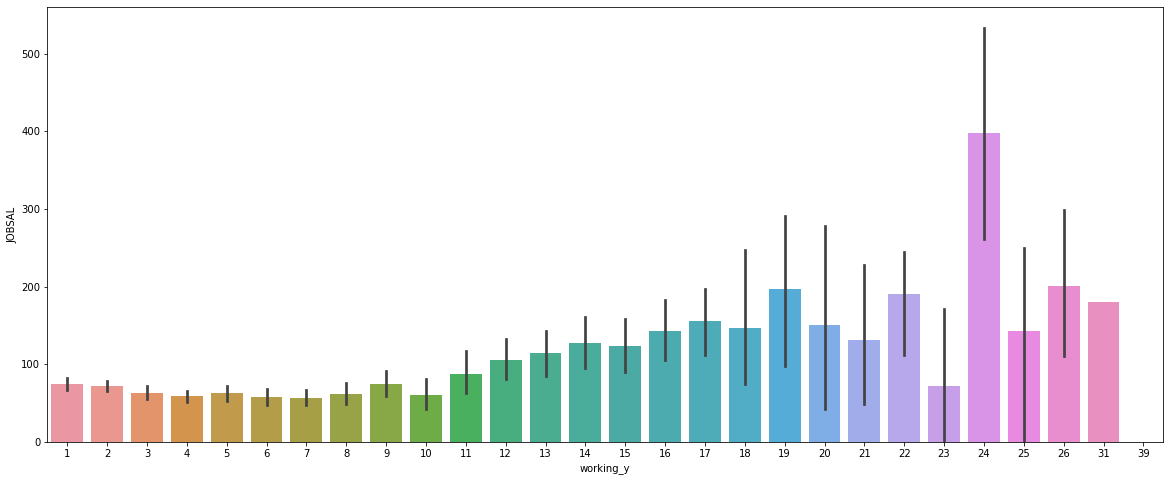

In [177]:
# 경력별 월급 확인-> 23년, 24년의 데이터가 이상함
plt.figure(figsize=(20, 8))
sns.barplot(x="working_y", y='JOBSAL', data = data_fin)
plt.show()

In [178]:
# 경력별 분포도 확인 -> upper fence 14 확인 -> 14년 이상 데이터는 drop 
fig1 = px.violin(data_fin, y='working_y')
fig2 = px.bar(data_fin, x='working_y',  y='JOBSAL')

fig1.show()
fig2.show()

In [179]:
# 경력 15년 이하 데이터만 남기고 drop
data_fin_1 = data_fin[data_fin['working_y'] < 15]
data_fin_1

,case,fa_job,fa_edu,life_15,fama_rel_15,age,edu,marry_YN,hschool,univ_mjor,...,job_1_in,job_1_out_2,job_1_keep,njob_in,njob_out,rjob_out,pjob_in,pjob_out,JOBSAL,working_y
94,1.0,5.0,4.0,3.0,2.0,32.0,6.0,1.0,1.0,7.0,...,1997.0,2007.0,1.0,0.0,0.0,0.0,0.0,0.0,180.0,10
168,4.0,2.0,6.0,3.0,4.0,19.0,5.0,2.0,1.0,0.0,...,2011.0,2012.0,1.0,0.0,0.0,0.0,0.0,0.0,32.0,1
192,4.0,7.0,3.0,3.0,3.0,19.0,4.0,2.0,3.0,0.0,...,2011.0,2012.0,1.0,0.0,0.0,0.0,0.0,0.0,220.0,1
465,1.0,12.0,3.0,5.0,6.0,32.0,7.0,1.0,-9.0,14.0,...,1998.0,2007.0,1.0,0.0,0.0,0.0,0.0,0.0,192.0,9
532,3.0,7.0,4.0,3.0,3.0,31.0,7.0,2.0,2.0,9.0,...,2009.0,2010.0,1.0,0.0,0.0,0.0,0.0,0.0,200.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62402,6.0,8.0,2.0,3.0,2.0,39.0,7.0,1.0,2.0,5.0,...,2000.0,2006.0,2.0,0.0,2006.0,0.0,2000.0,2006.0,0.0,6
62403,6.0,4.0,4.0,3.0,3.0,48.0,7.0,1.0,2.0,9.0,...,1990.0,2000.0,2.0,0.0,0.0,0.0,1990.0,2000.0,0.0,10
62407,6.0,5.0,3.0,4.0,3.0,39.0,6.0,1.0,1.0,3.0,...,1999.0,2009.0,2.0,0.0,0.0,0.0,2014.0,2014.0,0.0,10
62409,6.0,6.0,2.0,4.0,3.0,42.0,4.0,1.0,3.0,0.0,...,1994.0,1999.0,2.0,0.0,1999.0,0.0,2014.0,2015.0,60.0,6


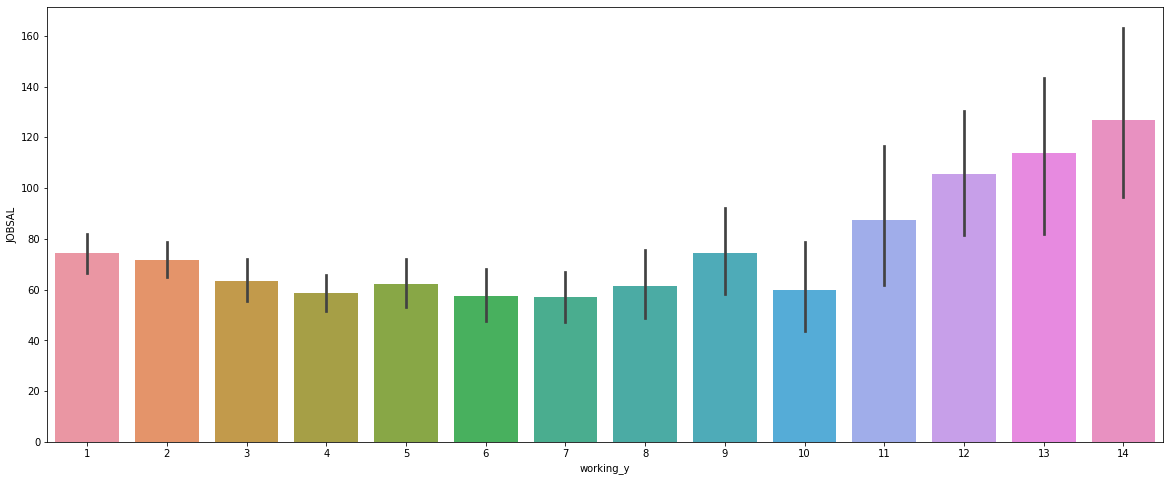

In [180]:
plt.figure(figsize=(20, 8))
sns.barplot(x="working_y", y='JOBSAL', data = data_fin_1)
plt.show()

In [181]:
data_fin_1

,case,fa_job,fa_edu,life_15,fama_rel_15,age,edu,marry_YN,hschool,univ_mjor,...,job_1_in,job_1_out_2,job_1_keep,njob_in,njob_out,rjob_out,pjob_in,pjob_out,JOBSAL,working_y
94,1.0,5.0,4.0,3.0,2.0,32.0,6.0,1.0,1.0,7.0,...,1997.0,2007.0,1.0,0.0,0.0,0.0,0.0,0.0,180.0,10
168,4.0,2.0,6.0,3.0,4.0,19.0,5.0,2.0,1.0,0.0,...,2011.0,2012.0,1.0,0.0,0.0,0.0,0.0,0.0,32.0,1
192,4.0,7.0,3.0,3.0,3.0,19.0,4.0,2.0,3.0,0.0,...,2011.0,2012.0,1.0,0.0,0.0,0.0,0.0,0.0,220.0,1
465,1.0,12.0,3.0,5.0,6.0,32.0,7.0,1.0,-9.0,14.0,...,1998.0,2007.0,1.0,0.0,0.0,0.0,0.0,0.0,192.0,9
532,3.0,7.0,4.0,3.0,3.0,31.0,7.0,2.0,2.0,9.0,...,2009.0,2010.0,1.0,0.0,0.0,0.0,0.0,0.0,200.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62402,6.0,8.0,2.0,3.0,2.0,39.0,7.0,1.0,2.0,5.0,...,2000.0,2006.0,2.0,0.0,2006.0,0.0,2000.0,2006.0,0.0,6
62403,6.0,4.0,4.0,3.0,3.0,48.0,7.0,1.0,2.0,9.0,...,1990.0,2000.0,2.0,0.0,0.0,0.0,1990.0,2000.0,0.0,10
62407,6.0,5.0,3.0,4.0,3.0,39.0,6.0,1.0,1.0,3.0,...,1999.0,2009.0,2.0,0.0,0.0,0.0,2014.0,2014.0,0.0,10
62409,6.0,6.0,2.0,4.0,3.0,42.0,4.0,1.0,3.0,0.0,...,1994.0,1999.0,2.0,0.0,1999.0,0.0,2014.0,2015.0,60.0,6


In [212]:
data_fin_1.columns

Index(['case', 'fa_job', 'fa_edu', 'life_15', 'fama_rel_15', 'age', 'edu',
       'marry_YN', 'hschool', 'univ_mjor', 'univ_area', 'jung_bi', 'level',
       'j_type', 'job_pp', 'job_1_in', 'job_1_out_2', 'job_1_keep', 'njob_in',
       'njob_out', 'rjob_out', 'pjob_in', 'pjob_out', 'JOBSAL', 'working_y'],
      dtype='object')

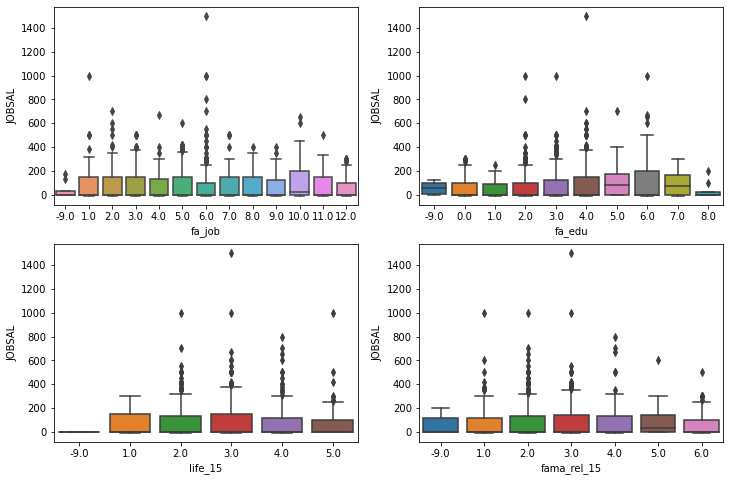

In [215]:
plt.figure(figsize=(12, 8))
plt.subplot(221)
sns.boxplot(x="fa_job", y='JOBSAL', data=data_fin_1)
plt.subplot(222)
sns.boxplot(x="fa_edu", y='JOBSAL', data=data_fin_1)
plt.subplot(223)
sns.boxplot(x="life_15", y='JOBSAL', data=data_fin_1)
plt.subplot(224)
sns.boxplot(x="fama_rel_15", y='JOBSAL', data=data_fin_1)


plt.show()

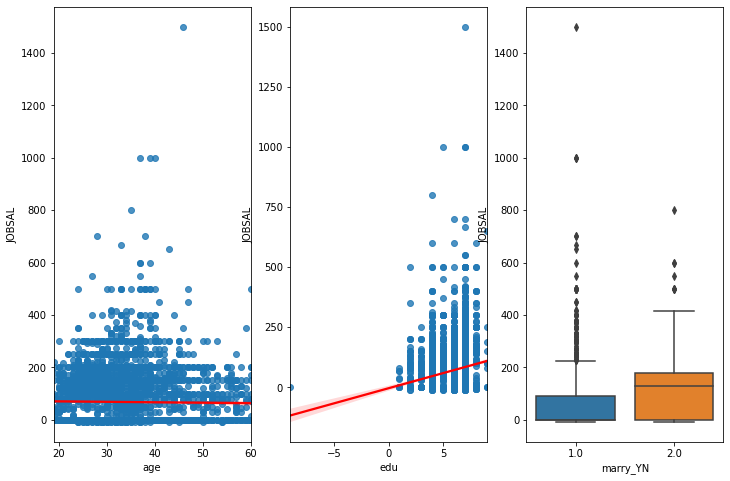

In [190]:
plt.figure(figsize=(12, 8))
plt.subplot(131)
sns.regplot(x="age", y='JOBSAL', data=data_fin_1, line_kws={'color':'red'})
plt.subplot(132)
sns.regplot(x="edu", y='JOBSAL', data=data_fin_1, line_kws={'color':'red'})
plt.subplot(133)
sns.boxplot(x="marry_YN", y='JOBSAL', data=data_fin_1)


plt.show()

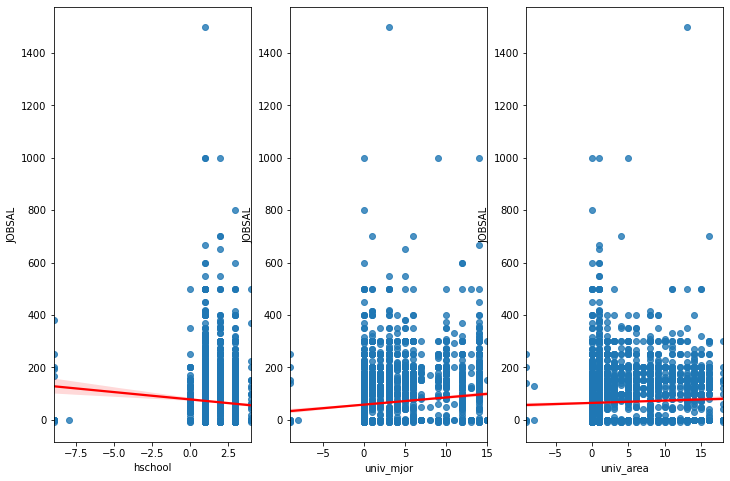

In [211]:
plt.figure(figsize=(12, 8))
plt.subplot(131)
sns.regplot(x="hschool", y='JOBSAL', data=data_fin_1, line_kws={'color':'red'})
plt.subplot(132)
sns.regplot(x="univ_mjor", y='JOBSAL', data=data_fin_1, line_kws={'color':'red'})
plt.subplot(133)
sns.regplot(x="univ_area", y='JOBSAL', data=data_fin_1, line_kws={'color':'red'})


plt.show()

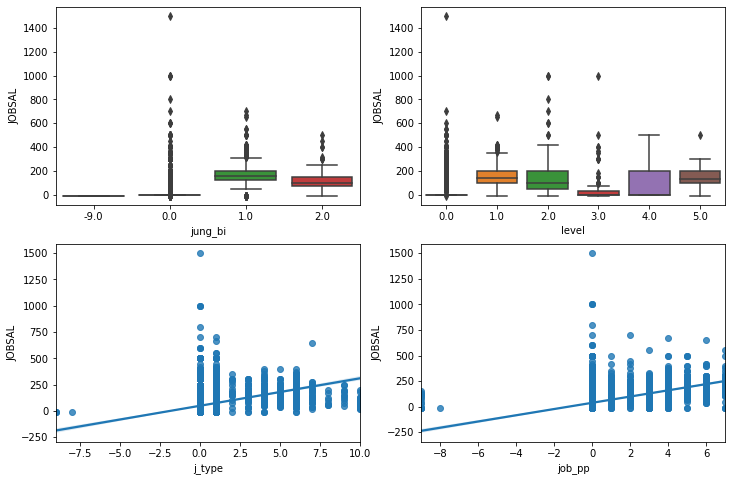

In [208]:
plt.figure(figsize=(12, 8))
plt.subplot(221)
sns.boxplot(x="jung_bi", y='JOBSAL', data=data_fin_1)
plt.subplot(222)
sns.boxplot(x="level", y='JOBSAL', data=data_fin_1)
plt.subplot(223)
sns.regplot(x="j_type", y='JOBSAL', data=data_fin_1)
plt.subplot(224)
sns.regplot(x="job_pp", y='JOBSAL', data=data_fin_1)


plt.show()

In [206]:
# 정규직/비정규직 에서 결측치(0)이 과반수 이상나와서 'jung_bi' 컬럼 drop
data_fin_1['jung_bi'].value_counts()

 0.0    3133
 1.0    1062
 2.0     506
-9.0       2
Name: jung_bi, dtype: int64

In [207]:
# 종사장지위 에서 결측치(0)이 과반수 이상나와서 'level' 컬럼 drop
data_fin_1['level'].value_counts()

0.0    3130
1.0    1164
2.0     276
3.0      81
5.0      44
4.0       8
Name: level, dtype: int64